In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)



In [222]:
data = pd.read_csv('Bengaluru_House_Data.csv')

In [223]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [224]:
#Checking size of dataframe

data.shape


(13320, 9)

In [225]:
#Checking information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


### As showing above there are 6 columns are categorical column and 3 columns are float

In [226]:
#Fecthing all Categorical Columns and num columns
cat_cols = []
num_cols = []
for col in data.columns:
    if(data[col].dtypes == 'object'):
        cat_cols.append(col)
    else:
        num_cols.append(col)
print('Categorical Colunms : ', cat_cols)  
print('Numerical Colunms : ',num_cols)   

Categorical Colunms :  ['area_type', 'availability', 'location', 'size', 'society', 'total_sqft']
Numerical Colunms :  ['bath', 'balcony', 'price']


In [227]:
#Checking different types of values each categorical column have

for col in cat_cols:
    print('Values are in {} column:'.format(col))
    print(data[col].value_counts())

Values are in area_type column:
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
Values are in availability column:
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
Values are in location column:
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int


I observed that there are few columns named as availability, balcony and society don't have that much importance also, society has more no. of null values so I am dropping the same from my data frame

In [228]:
data.drop(['availability','society','balcony'], inplace = True, axis = 1)

In [229]:
data.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


# Data Cleaning

In [230]:
#Checking for null values
data.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [239]:
data1 = data.copy()

#### As above there are very less Na values so I am just dropping all na values

In [240]:
data1.dropna(inplace = True, axis = 0)

In [241]:
data1.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [242]:
data1.shape

(13246, 6)

#### I have dropped all the null values and now I have 13246 rows in my dataset which are sufficiant to train a model. 

#### Next I will work on my categorical features which are not in proper format. First I will work on size column, size column has some values like BHK and BEDROOM which tells us size of house so here no need of BHK and Bedroom. We can simply fetch no. and convert this column into integer


In [250]:
# Defining a function to fetch no. from size. As we have cheked first letter in string is a no. so we will fecth the same from the String
num = ''
def fetch_num(x):
        x= x.split(' ')
        return int(x[0])
 

In [252]:
data1['bhk'] = data1['size'].apply(lambda x : fetch_num(x))

In [253]:
data1.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [254]:
data1[data1['bath']>10]

,area_type,location,size,total_sqft,bath,price,bhk
938,Plot Area,5th Phase JP Nagar,9 Bedroom,1260,11.0,290.0,9
1078,Plot Area,BTM 1st Stage,9 Bedroom,3300,14.0,500.0,9
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
1768,Plot Area,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,170.0,11
1953,Plot Area,KR Puram,8 Bedroom,1200,12.0,110.0,8
1979,Plot Area,Hongasandra,8 Bedroom,990,12.0,120.0,8
3096,Super built-up Area,Jp nagar 8th Phase .,10 BHK,12000,12.0,525.0,10
3379,Super built-up Area,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Super built-up Area,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [255]:
#Now I will work on total_sqft column
data1.total_sqft.unique()


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

 #### As above seen there are different type of values in sqft column like range between 2 values. We need to check more type of values in the same and for that I will write following function

In [256]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [257]:
#finding out all values which are not float
data1[~data1['total_sqft'].apply(is_float)]

,area_type,location,size,total_sqft,bath,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...,...
12975,Super built-up Area,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Super built-up Area,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Super built-up Area,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Super built-up Area,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


#### As we have checked above most of the values are in range between 2 values so we will take avarage of these 2 values. Now I will write a function to convert all values into float and which are is not proper format (Range Format), I will take avarage of both the values in convert them into float

In [258]:
#Creating a copy of data

data2 = data1.copy()

In [259]:
num = ''
def convert_float(x):
    num = x.split('-')
    if(len(num) == 2):
        return (float(num[0])+float(num[1]))/2
    try:
        return float(x)
    except:
        return None

In [260]:
#applying above function on total_sqft column

data2['total_sqft'] = data2['total_sqft'].apply(convert_float)

In [261]:
data2.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [262]:
# Again checking different values of total_sqft

data2[~data2['total_sqft'].apply(is_float)]

,area_type,location,size,total_sqft,bath,price,bhk


In [263]:
data2['total_sqft'] = data2['total_sqft'].apply(convert_sqft_float)


In [264]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13246 non-null  object 
 1   location    13246 non-null  object 
 2   size        13246 non-null  object 
 3   total_sqft  13200 non-null  float64
 4   bath        13246 non-null  float64
 5   price       13246 non-null  float64
 6   bhk         13246 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 827.9+ KB


In [265]:
data2.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [266]:
# Now I will work on location column, As checked above there are more no. of unique values in location column

len(data.location.unique())

1306

#### There are total 1265 unique location which is huge in number and if we will do one hot encoding then it will become dimentionality curse. For that we need to apply some dimentionality deduction alogorithms like PCA.

#### We have one more and effective solution for this, if there are many location coming between 1 to 10 then we can replace the same with "Other" location.

In [267]:
# Finding out occurence of location
data3 = data2.copy()
data3.location  = data3.location.apply(lambda x : x.strip())


In [268]:
loc_stats = data3.groupby('location')['location'].agg('count').sort_values(ascending = False)
loc_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [269]:
#I will give one threshold of 20 and less than 20 data point location will become Other location

len(loc_stats[loc_stats<20])

1145

In [270]:
#Creating a list which locations data points are less than 20 or 10
loc_less_than_20 = loc_stats[loc_stats<20]
loc_less_than_10 = loc_stats[loc_stats<10]

In [271]:
loc_less_than_20

location
OMBR Layout              19
Pai Layout               19
Kaggalipura              19
Kalyan nagar             19
HRBR Layout              19
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1145, dtype: int64

In [272]:
data4 = data3.copy()

In [273]:
data4.location = data4.location.apply(lambda x : 'Other' if x in loc_less_than_20 else x)

In [274]:
data4.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Other,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [275]:
#removing NUll values from total_sqft

data4.dropna(axis = 0, inplace = True)

In [276]:
data4.shape

(13200, 7)

In [277]:
data4.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

## Detecting Outlier and Removal

In [278]:
# I believe that we can create 1 bhk in 300 sqft so I am filtering data according to that

data4[data4.total_sqft/data4.bhk<300]

,area_type,location,size,total_sqft,bath,price,bhk
9,Plot Area,Other,6 Bedroom,1020.0,6.0,370.0,6
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,200.0,8
58,Plot Area,Other,6 Bedroom,1407.0,4.0,150.0,6
68,Plot Area,Other,8 Bedroom,1350.0,7.0,85.0,8
70,Plot Area,Other,3 Bedroom,500.0,3.0,100.0,3
...,...,...,...,...,...,...,...
13277,Plot Area,Other,7 Bedroom,1400.0,7.0,218.0,7
13279,Plot Area,Other,6 Bedroom,1200.0,5.0,130.0,6
13281,Plot Area,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5
13303,Plot Area,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5


In [279]:
data5 = data4[~(data4.total_sqft/data4.bhk<300)]

In [280]:
data5.shape

(12456, 7)

In [281]:
#Calculating price per sqft

data5['price_per_sqft'] = (data5['price']*100000)/data5['total_sqft']

C:\Users\vinee\AppData\Local\Temp\ipykernel_6916\660628748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['price_per_sqft'] = (data5['price']*100000)/data5['total_sqft']


In [282]:
data5.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Other,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [283]:
data5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

#### Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation



In [284]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data6 = remove_pps_outliers(data5)
data6.shape

(10418, 8)

In [285]:
data6.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.557522
1,Super built-up Area,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
2,Built-up Area,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667
3,Super built-up Area,1st Phase JP Nagar,3 BHK,2065.0,4.0,210.0,3,10169.491525
4,Super built-up Area,1st Phase JP Nagar,3 BHK,2024.0,3.0,157.0,3,7756.916996


#### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

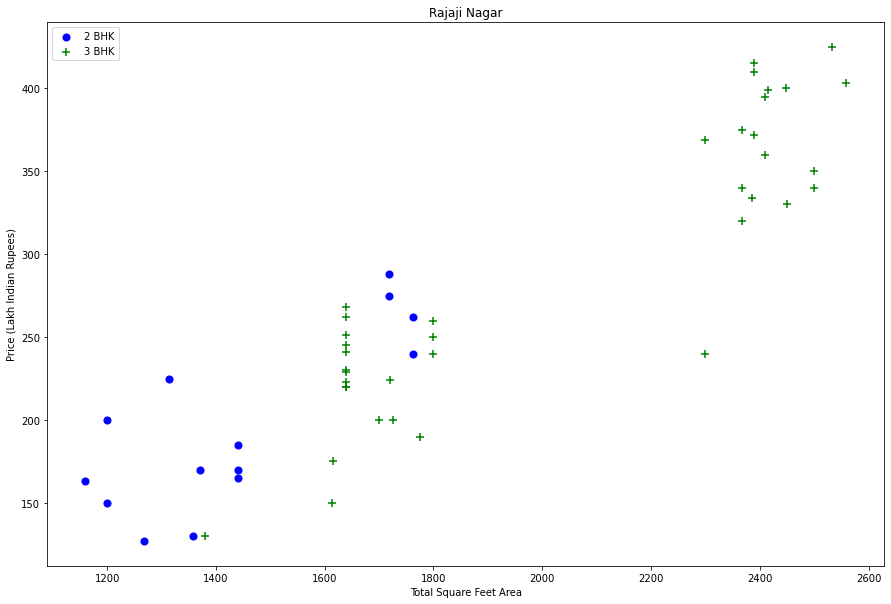

In [286]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data6,"Rajaji Nagar")

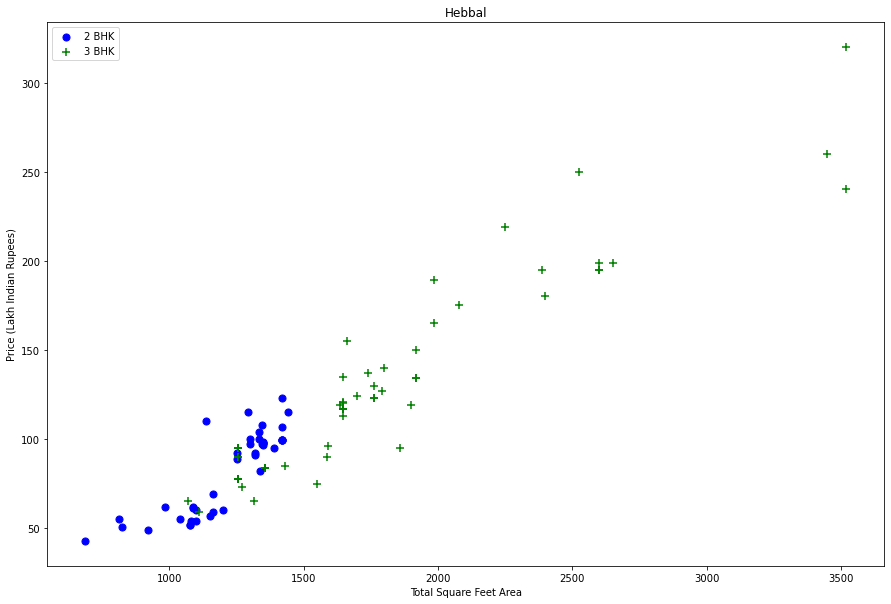

In [287]:
plot_scatter_chart(data6,"Hebbal")

In [288]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
data7 = remove_bhk_outliers(data6)



In [289]:
data7.shape

(6994, 8)

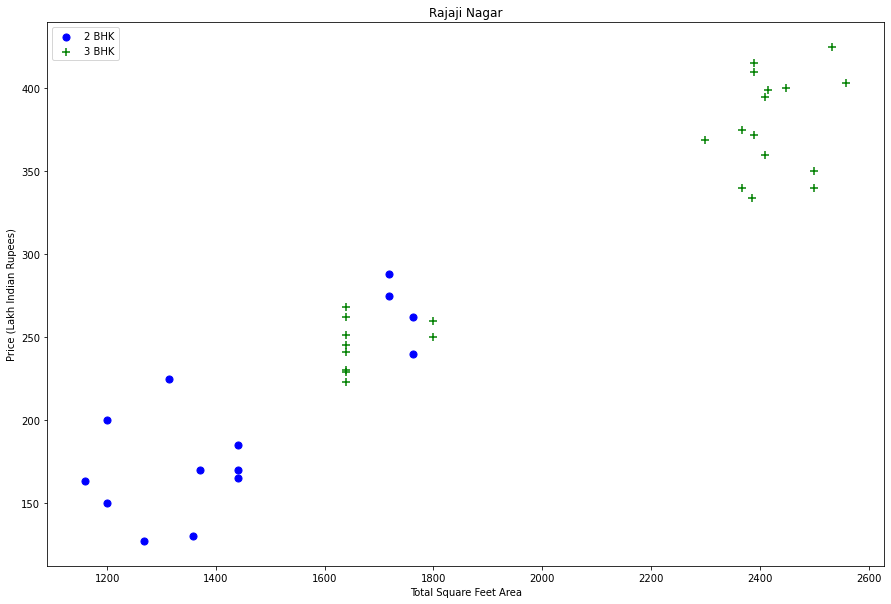

In [290]:
plot_scatter_chart(data7,"Rajaji Nagar")

Text(0, 0.5, 'Count')

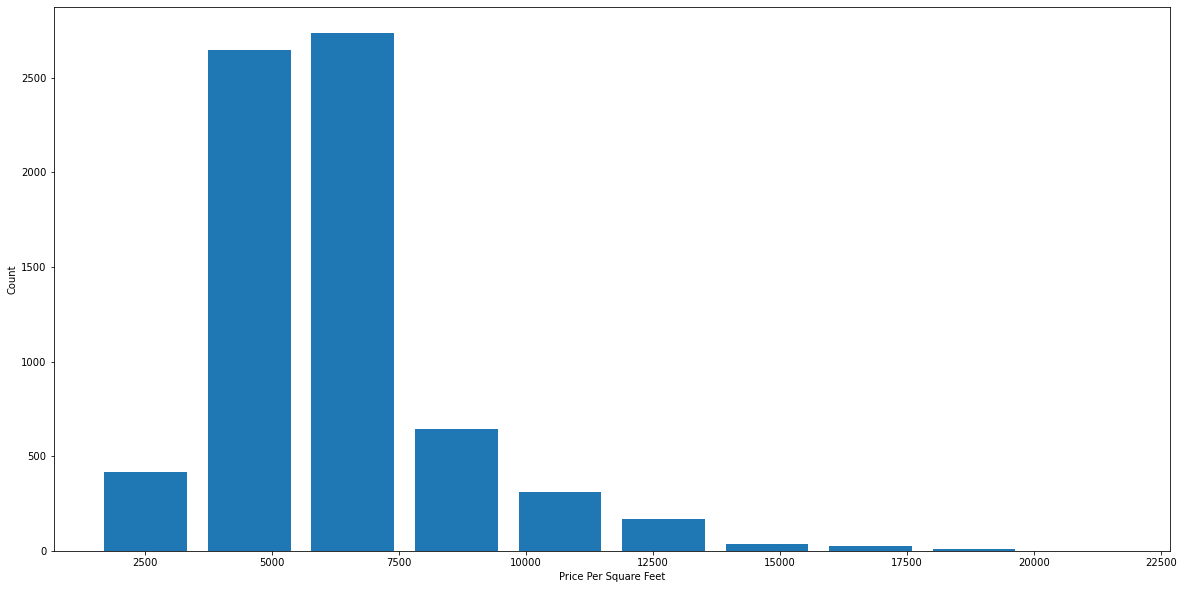

In [291]:

matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [292]:
data7.bath.unique()

array([ 3.,  5.,  4.,  2.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

#### As above checked there are max 16 bathroom house in our dataset which is unusual so we will explore bathroom feature in our dataset

Text(0, 0.5, 'Count')

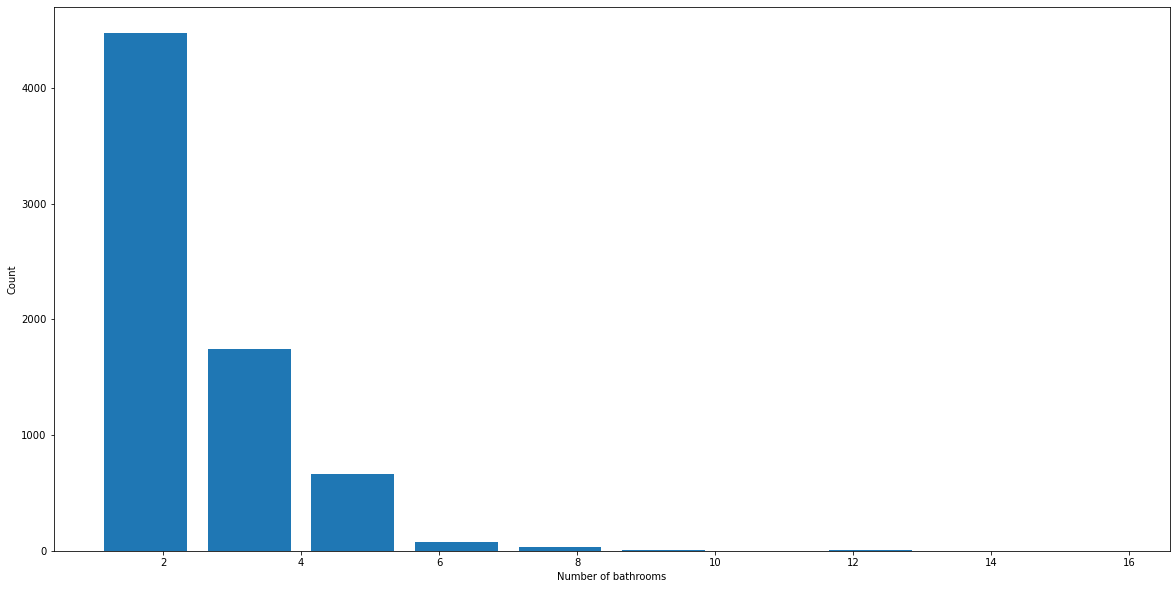

In [293]:
#PLoting a histogram for bathcount
plt.hist(data7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

#### There more no. of data points are in between 2 to 4 bathroom

In [294]:
# Lets check how many data points are there above 10 bathrooms

data7[data7['bath']>10]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
5482,Super built-up Area,Other,10 BHK,12000.0,12.0,525.0,10,4375.000000
5622,Super built-up Area,Other,16 BHK,10000.0,16.0,550.0,16,5500.000000
6673,Super built-up Area,Other,11 BHK,6000.0,12.0,150.0,11,2500.000000
6841,Super built-up Area,Other,10 BHK,4000.0,12.0,160.0,10,4000.000000
7174,Super built-up Area,Other,13 BHK,5425.0,13.0,275.0,13,5069.124424


#### Let's suppose that if no. of bathroom is greater than no. of bhk+2 then we will remove those outliers

In [296]:
#CHecking no. data points which are satisfying above condition
data7[data7['bath']>data7['bhk']+2]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
5365,Super built-up Area,Other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
7531,Built-up Area,Other,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
9235,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [297]:
data8 = data7[data7['bath']<data7['bhk']+2]

In [298]:
data8.shape

(6917, 8)

In [301]:
# Lets drop extra feature from our dataset which are size and price_per_sqft(Used only for outlier detection)

data9 = data8.drop(['size','price_per_sqft'], axis = 1)

In [302]:
data9.head()

,area_type,location,total_sqft,bath,price,bhk
1,Super built-up Area,1st Phase JP Nagar,1875.0,3.0,167.0,3
2,Built-up Area,1st Phase JP Nagar,1500.0,5.0,85.0,5
3,Super built-up Area,1st Phase JP Nagar,2065.0,4.0,210.0,3
5,Super built-up Area,1st Phase JP Nagar,2059.0,3.0,225.0,3
6,Super built-up Area,1st Phase JP Nagar,1394.0,2.0,100.0,2


#### Converting categorical feature to numerical using one hot encoding

In [303]:
dummies = pd.get_dummies(data9, drop_first=True)

In [305]:
dummies.columns

Index(['total_sqft', 'bath', 'price', 'bhk', 'area_type_Carpet  Area',
       'area_type_Plot  Area', 'area_type_Super built-up  Area',
       'location_2nd Stage Nagarbhavi', 'location_5th Phase JP Nagar',
       'location_6th Phase JP Nagar',
       ...
       'location_Uttarahalli', 'location_Varthur', 'location_Vidyaranyapura',
       'location_Vijayanagar', 'location_Vittasandra', 'location_Whitefield',
       'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yeshwanthpur'],
      dtype='object', length=155)

In [306]:
df = dummies

In [307]:
df.shape

(6917, 155)

# Train Test Split

In [308]:
X = df.drop('price', axis = 1)

In [309]:
y = df['price']

In [310]:
X.head()

,total_sqft,bath,bhk,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_2nd Stage Nagarbhavi,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,...,location_Uttarahalli,location_Varthur,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yeshwanthpur
1,1875.0,3.0,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1500.0,5.0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2065.0,4.0,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2059.0,3.0,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1394.0,2.0,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [311]:
y.head()

1    167.0
2     85.0
3    210.0
5    225.0
6    100.0
Name: price, dtype: float64

In [313]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# Building a Linear Regression Model

In [314]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8519660245470071

# Use K Fold cross validation to measure accuracy of our LinearRegression model

In [315]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.80538958, 0.88660671, 0.80176495, 0.86465344, 0.78800787])

### We can see that in 5 iterations we get a score more 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

In [316]:
##Find best model using GridSearchCV

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\vinee\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\vinee\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_score,best_params
0,linear_regression,0.829285,{'normalize': False}
1,lasso,0.755497,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.764728,"{'criterion': 'mse', 'splitter': 'best'}"


## Test the model for few properties

In [345]:
columns = X.columns
columns = list(columns)
columns

['total_sqft',
 'bath',
 'bhk',
 'area_type_Carpet  Area',
 'area_type_Plot  Area',
 'area_type_Super built-up  Area',
 'location_2nd Stage Nagarbhavi',
 'location_5th Phase JP Nagar',
 'location_6th Phase JP Nagar',
 'location_7th Phase JP Nagar',
 'location_8th Phase JP Nagar',
 'location_9th Phase JP Nagar',
 'location_Abbigere',
 'location_Akshaya Nagar',
 'location_Ambalipura',
 'location_Ambedkar Nagar',
 'location_Amruthahalli',
 'location_Anandapura',
 'location_Ananth Nagar',
 'location_Anekal',
 'location_Ardendale',
 'location_Attibele',
 'location_BTM 2nd Stage',
 'location_Babusapalaya',
 'location_Balagere',
 'location_Banashankari',
 'location_Banashankari Stage III',
 'location_Bannerghatta Road',
 'location_Basavangudi',
 'location_Basaveshwara Nagar',
 'location_Battarahalli',
 'location_Begur Road',
 'location_Bellandur',
 'location_Bhoganhalli',
 'location_Binny Pete',
 'location_Bisuvanahalli',
 'location_Bommanahalli',
 'location_Bommasandra',
 'location_Bommasand

In [343]:
def predict_price(location,area_type,sqft,bath,bhk):    
    loc_index = columns.index(location)
    at_index =  columns.index(area_type)

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if at_index >= 0:
        x[at_index] = 1
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [347]:
predict_price('location_Kaggadasapura','area_type_Plot  Area',1000, 3, 3)

C:\Users\vinee\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


46.72701620557146

In [321]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [348]:
import json

with open("columns.json","w") as f:
    f.write(json.dumps(columns))